In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Ixiondbz/House-Prices-Prediction-Advanced-Regression-Techniques-/main/train_numerical.csv")

In [3]:
numericalFeatures = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

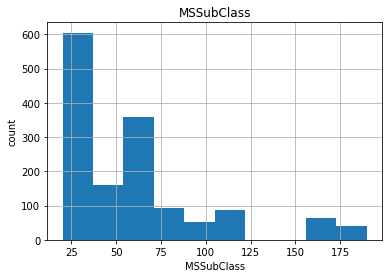

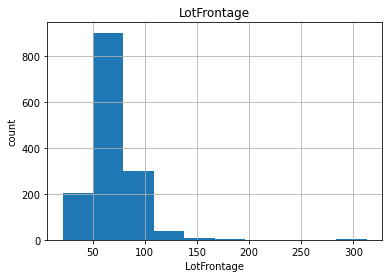

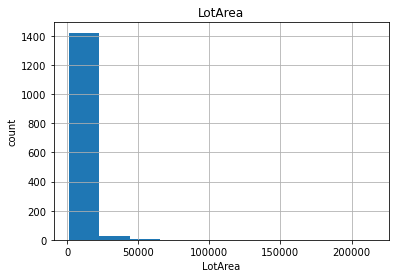

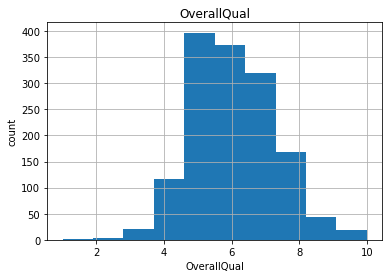

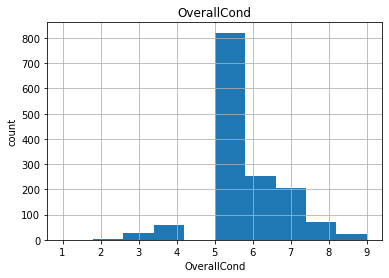

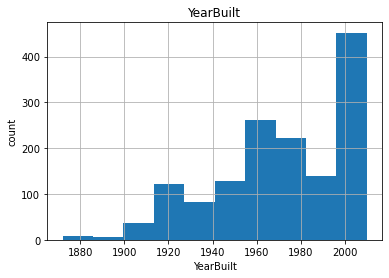

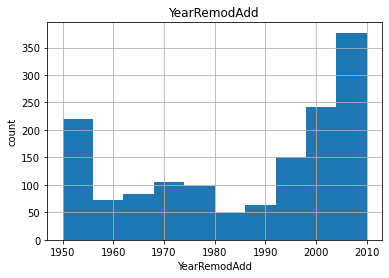

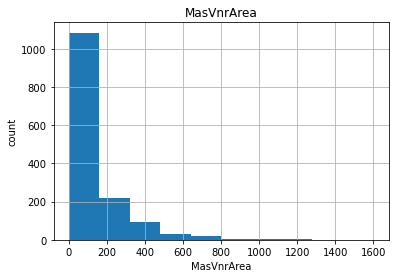

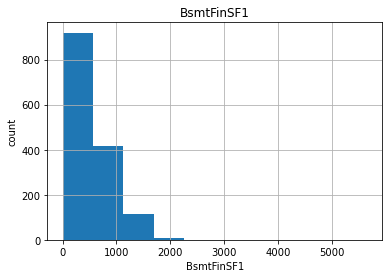

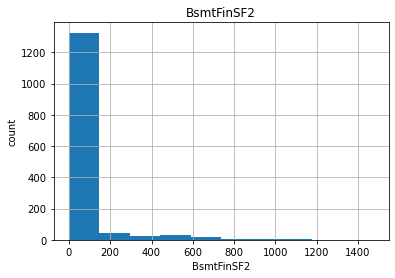

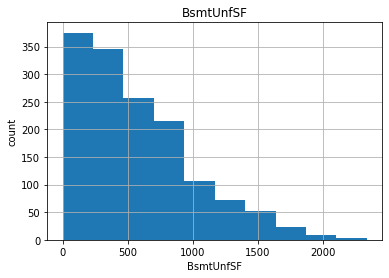

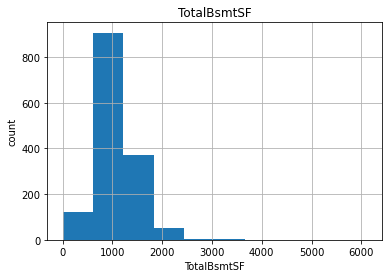

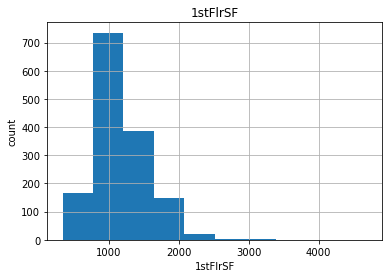

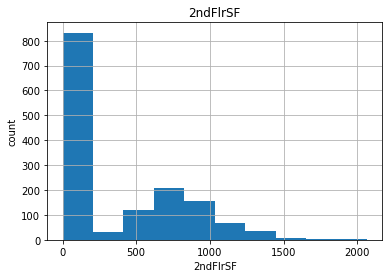

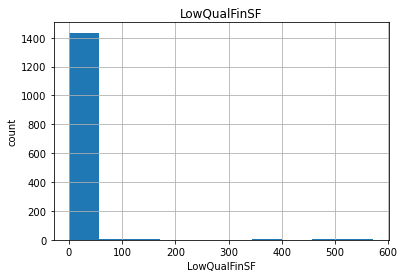

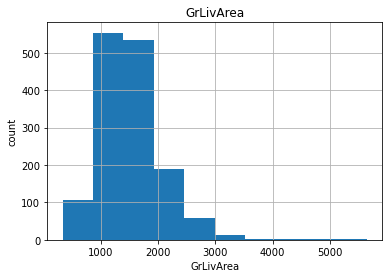

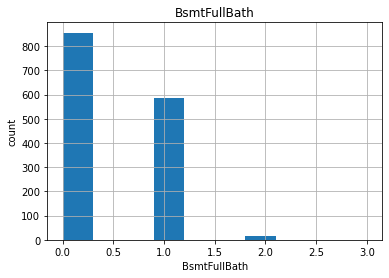

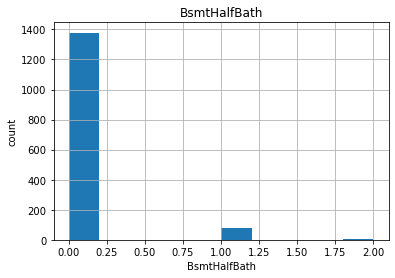

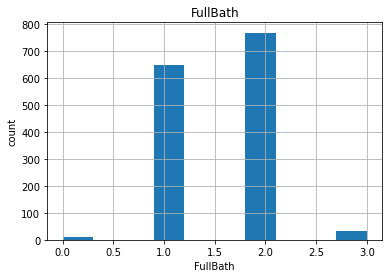

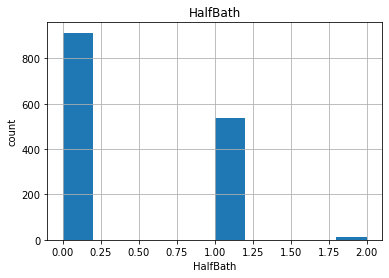

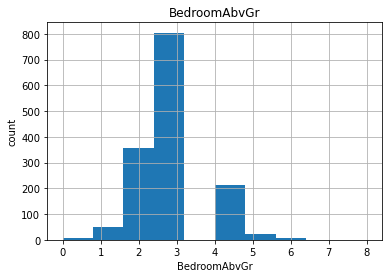

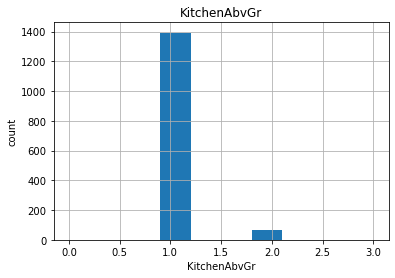

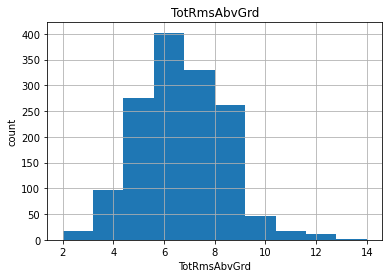

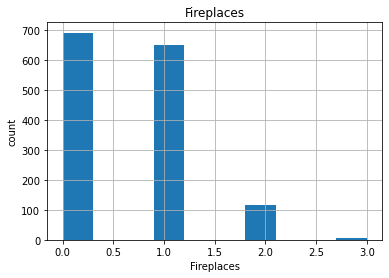

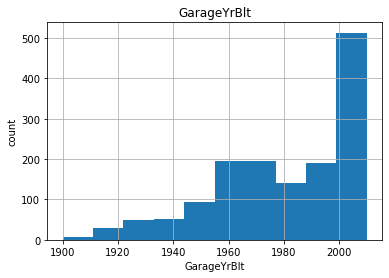

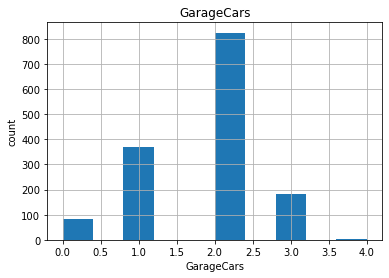

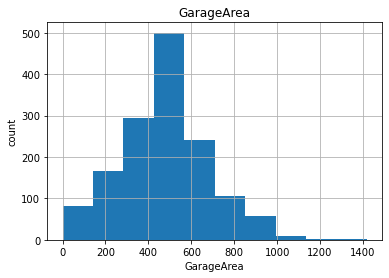

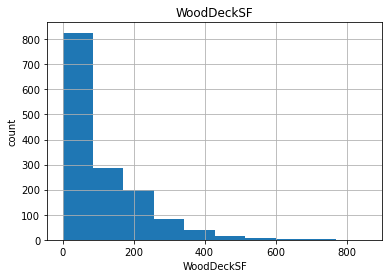

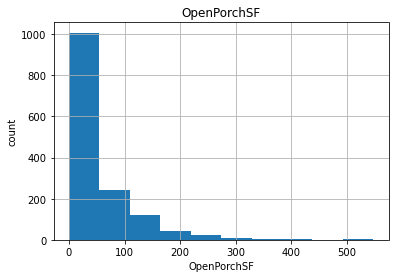

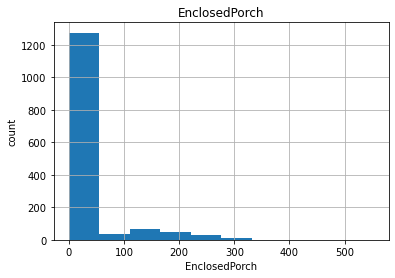

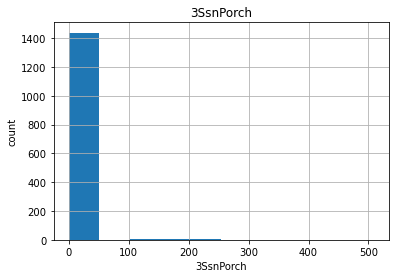

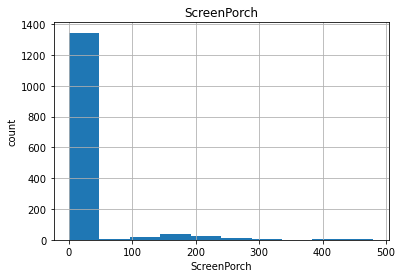

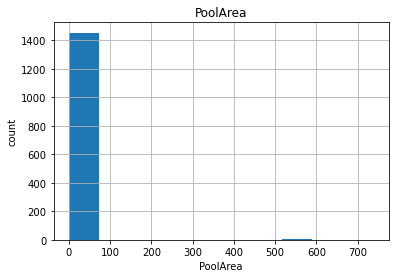

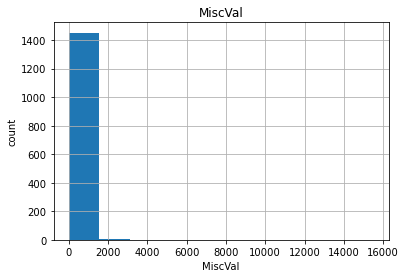

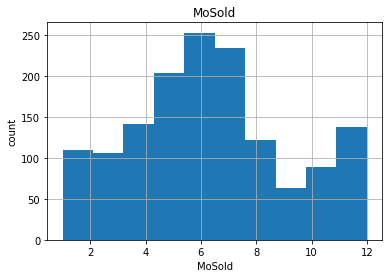

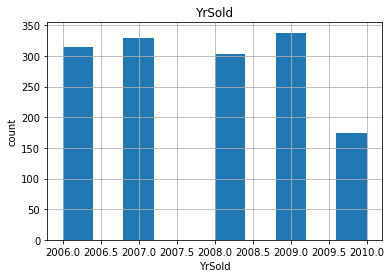

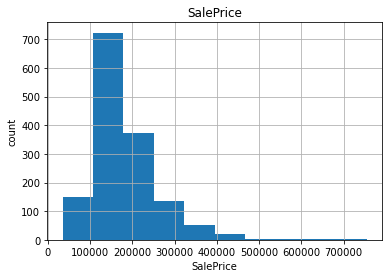

In [4]:
for feature in numericalFeatures:
    data=df.copy()
    data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

## **Converting to Normal distribution**

In [5]:
Non_NormalFeatures = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [6]:
df_nd = df.copy()

In [7]:
df_nd[Non_NormalFeatures]

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,5,2003,2003,196.0,706,0,150,...,2,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,8,1976,1976,0.0,978,0,284,...,2,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,5,2001,2002,162.0,486,0,434,...,2,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,5,1915,1970,0.0,216,0,540,...,3,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,5,2000,2000,350.0,655,0,490,...,3,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,5,1999,2000,0.0,0,0,953,...,2,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,1978,1988,119.0,790,163,589,...,2,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,9,1941,2006,0.0,275,0,877,...,1,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,6,1950,1996,0.0,49,1029,0,...,1,366,0,112,0,0,0,0,4,2010


In [8]:
for feature in Non_NormalFeatures:
    if df_nd[feature].eq(0).any() == True:
        print(feature)

MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
Fireplaces
GarageCars
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal


In [9]:
for feature in Non_NormalFeatures:
    if df_nd[feature].eq(0).any() == True:
        df_nd[feature] = df_nd[feature].replace(0.0,0.00001)

In [10]:
df_nd

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,1.0,65.0,8450,0.0,3.0,2.0,0.0,3.0,2.0,...,0.00001,0.00001,0.00001,0.00001,0.00001,2,2008,3.0,1.0,208500
1,20,1.0,80.0,9600,0.0,3.0,2.0,0.0,2.0,2.0,...,0.00001,0.00001,0.00001,0.00001,0.00001,5,2007,3.0,1.0,181500
2,60,1.0,68.0,11250,0.0,2.0,2.0,0.0,3.0,2.0,...,0.00001,0.00001,0.00001,0.00001,0.00001,9,2008,3.0,1.0,223500
3,70,1.0,60.0,9550,0.0,2.0,2.0,0.0,4.0,2.0,...,272.00000,0.00001,0.00001,0.00001,0.00001,2,2006,3.0,4.0,140000
4,60,1.0,84.0,14260,0.0,2.0,2.0,0.0,2.0,2.0,...,0.00001,0.00001,0.00001,0.00001,0.00001,12,2008,3.0,1.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,1.0,62.0,7917,0.0,3.0,2.0,0.0,3.0,2.0,...,0.00001,0.00001,0.00001,0.00001,0.00001,8,2007,3.0,1.0,175000
1456,20,1.0,85.0,13175,0.0,3.0,2.0,0.0,3.0,2.0,...,0.00001,0.00001,0.00001,0.00001,0.00001,2,2010,3.0,1.0,210000
1457,70,1.0,66.0,9042,0.0,3.0,2.0,0.0,3.0,2.0,...,0.00001,0.00001,0.00001,0.00001,2500.00000,5,2010,3.0,1.0,266500
1458,20,1.0,68.0,9717,0.0,3.0,2.0,0.0,3.0,2.0,...,112.00000,0.00001,0.00001,0.00001,0.00001,4,2010,3.0,1.0,142125


In [11]:
for feature in Non_NormalFeatures:
    df_nd[feature] = np.log(df_nd[feature])

In [12]:
df_nd

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.094345,1.0,4.174387,9.041922,0.0,3.0,2.0,0.0,3.0,2.0,...,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,0.693147,7.604894,3.0,1.0,208500
1,2.995732,1.0,4.382027,9.169518,0.0,3.0,2.0,0.0,2.0,2.0,...,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,1.609438,7.604396,3.0,1.0,181500
2,4.094345,1.0,4.219508,9.328123,0.0,2.0,2.0,0.0,3.0,2.0,...,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,2.197225,7.604894,3.0,1.0,223500
3,4.248495,1.0,4.094345,9.164296,0.0,2.0,2.0,0.0,4.0,2.0,...,5.605802,-11.512925,-11.512925,-11.512925,-11.512925,0.693147,7.603898,3.0,4.0,140000
4,4.094345,1.0,4.430817,9.565214,0.0,2.0,2.0,0.0,2.0,2.0,...,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,2.484907,7.604894,3.0,1.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.094345,1.0,4.127134,8.976768,0.0,3.0,2.0,0.0,3.0,2.0,...,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,2.079442,7.604396,3.0,1.0,175000
1456,2.995732,1.0,4.442651,9.486076,0.0,3.0,2.0,0.0,3.0,2.0,...,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,0.693147,7.605890,3.0,1.0,210000
1457,4.248495,1.0,4.189655,9.109636,0.0,3.0,2.0,0.0,3.0,2.0,...,-11.512925,-11.512925,-11.512925,-11.512925,7.824046,1.609438,7.605890,3.0,1.0,266500
1458,2.995732,1.0,4.219508,9.181632,0.0,3.0,2.0,0.0,3.0,2.0,...,4.718499,-11.512925,-11.512925,-11.512925,-11.512925,1.386294,7.605890,3.0,1.0,142125


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
feature_cols = df_nd.columns[:75]

In [15]:
feature_cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [16]:
X = df_nd[feature_cols]
Y = df_nd['SalePrice']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=1)
print(X_train.shape)
print(Y_train.shape)

(1095, 75)
(1095,)


In [18]:
linreg = LinearRegression()

In [19]:
linreg.fit(X_train, Y_train)

LinearRegression()

In [20]:
print(linreg.intercept_)

5178990.207751647


In [21]:
linreg.score(X_test,Y_test)

0.8242186160209639

Variance Threshold

In [22]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0.001)
var_thres.fit(df_nd)
constant_features = [c for c in df_nd.columns if c not in df_nd.columns[var_thres.get_support()]]
len(constant_features)
constant_features
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr
correlated_features = correlation(df_nd,0.9)
correlated_features

{'Exterior2nd', 'Heating'}

Ridge Regression 

In [23]:
from sklearn.linear_model import Ridge,Lasso

In [24]:
ridge = Ridge(alpha=1000)
ridge.fit(X_train,Y_train)

Ridge(alpha=1000)

In [25]:
ridge.score(X_test,Y_test)

0.8417180454748552

In [26]:
lasso = Lasso(alpha=2000)
lasso.fit(X_train,Y_train)

Lasso(alpha=2000)

In [27]:
lasso.score(X_test,Y_test)

0.8454827856476982

Feature Engineering/ Select to improve accuracy

<AxesSubplot:>

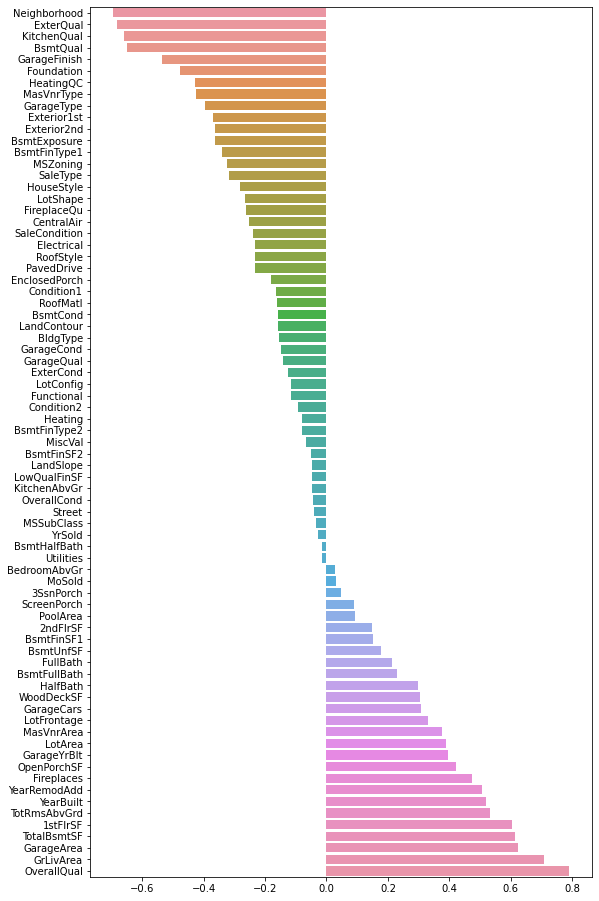

In [28]:
#correletion Barplote
plt.figure(figsize=(9,16))
corr_feat_series = pd.Series.sort_values(X.corrwith(Y))
sns.barplot(x=corr_feat_series, y=corr_feat_series.index, orient='h')

In [29]:
df_nd.drop(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea','ExterQual', 'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch'], axis = 1, inplace = True)

In [30]:
df_nd

,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-11.512925,-11.512925,-11.512925,0.693147,7.604894,3.0,1.0,208500
1,-11.512925,-11.512925,-11.512925,1.609438,7.604396,3.0,1.0,181500
2,-11.512925,-11.512925,-11.512925,2.197225,7.604894,3.0,1.0,223500
3,-11.512925,-11.512925,-11.512925,0.693147,7.603898,3.0,4.0,140000
4,-11.512925,-11.512925,-11.512925,2.484907,7.604894,3.0,1.0,250000
...,...,...,...,...,...,...,...,...
1455,-11.512925,-11.512925,-11.512925,2.079442,7.604396,3.0,1.0,175000
1456,-11.512925,-11.512925,-11.512925,0.693147,7.605890,3.0,1.0,210000
1457,-11.512925,-11.512925,7.824046,1.609438,7.605890,3.0,1.0,266500
1458,-11.512925,-11.512925,-11.512925,1.386294,7.605890,3.0,1.0,142125
